# Basic statistics and visualization technqiues

Our goal in this notebook is to introduce some basic notions from statistics, along with some visualization techniques. We will use the "real_estate_valuation" and "wine" datasets for visualization.  

As usual, let's start by importing the necessary libraries and datasets (we use the train sets).

In [77]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the seaborn plots
sns.set_style("whitegrid")

# read in the data
rev = pd.read_csv('../data/regression/real_estate_valuation/train.csv')
wine = pd.read_csv('../data/classification/wine/train.csv')

# get data description for both datasets
rev_vars = pd.read_csv('../data/regression/real_estate_valuation/data_description.csv')
wine_vars = pd.read_csv('../data/classification/wine/data_description.csv')

# keep only name, role, type, and new_col_name of vars dataframes
rev_vars = rev_vars[['new_col_name', 'name', 'type', 'role']]
wine_vars = wine_vars[['new_col_name', 'name', 'type', 'role']]

In [78]:
print(f'Real estate valuation dataset: {rev.shape[0]} rows, {rev.shape[1]} columns')
print(rev_vars)
print(f'Wine dataset: {wine.shape[0]} rows, {wine.shape[1]} columns')
print(wine_vars)

Real estate valuation dataset: 331 rows, 7 columns
  new_col_name                                    name        type     role
0           No                                      No     Integer       ID
1           X1                     X1 transaction date  Continuous  Feature
2           X2                            X2 house age  Continuous  Feature
3           X3  X3 distance to the nearest MRT station  Continuous  Feature
4           X4         X4 number of convenience stores     Integer  Feature
5           X5                             X5 latitude  Continuous  Feature
6           X6                            X6 longitude  Continuous  Feature
7            Y              Y house price of unit area  Continuous   Target
Wine dataset: 142 rows, 14 columns
   new_col_name                          name         type     role
0             Y                         class  Categorical   Target
1            X1                       Alcohol   Continuous  Feature
2            X2           

## Basic notions of statistics

### Distributions
A distribution is a generalization of the concept of a function. The precise definition is way too technical for our course, so instead we try to offer an intuitive understanding of the concept.

Recall that columns in our dataset correspond to observed features (or the target). Each column's values are a set of numbers, if it is continuous, or a finite set of categories, if it is categorical. A distribution is a function that describes how the values of a column are distributed. That is, it describes how likely it is to observe a value in a certain range. 

In visual terms, we can think of a distrbution simply as a *histogram*: this is a visualization technique in which we divide up the range of possible values of the variable (called the *support of the variable*) into a number of intervals (called *bins*), and then we count how many values fall into each bin. The count of each bin is usually reflected by the height of the bar corresponding to that bin. In this way, we can visualize how the values of a variable are distributed.

We illustrate this below by plotting histograms of the target columns of the two datasets.

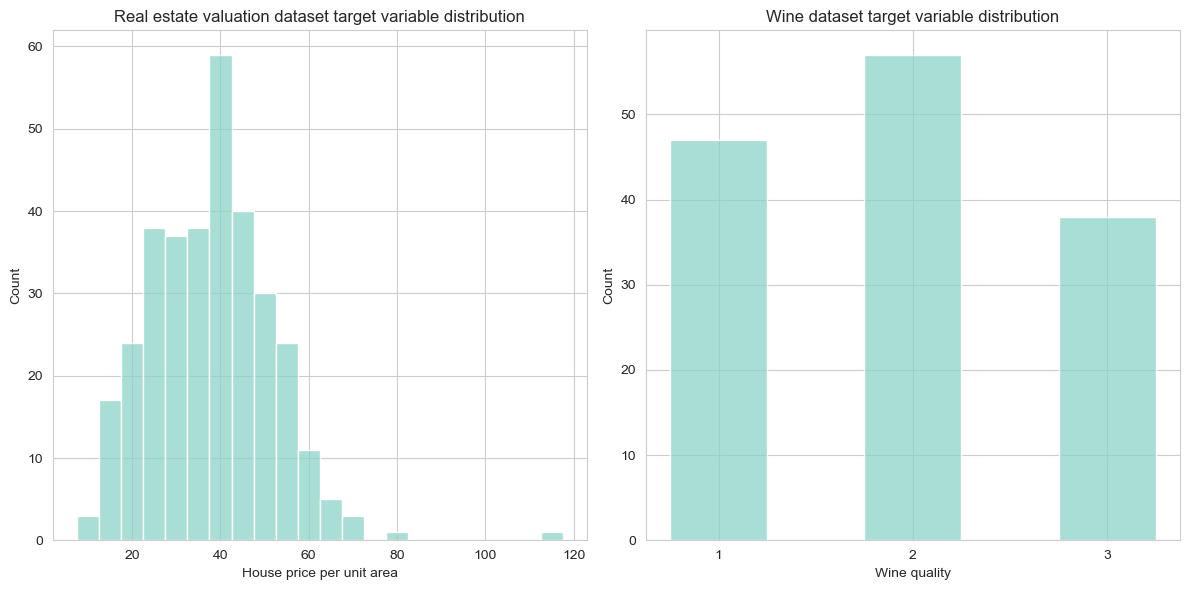

In [79]:
# plot the distributions of the target variables in both datasets

# create fig and axes with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot the distribution of the target variable in the real estate valuation dataset
sns.histplot(rev['Y'], ax=ax[0], binwidth=5)
ax[0].set_title('Real estate valuation dataset target variable distribution')
ax[0].set_xlabel('House price per unit area')
ax[0].set_ylabel('Count')

# plot the distribution of the target variable in the wine dataset
sns.histplot(wine['Y'], ax=ax[1], discrete=True, shrink=0.5)
ax[1].set_title('Wine dataset target variable distribution')
ax[1].set_xlabel('Wine quality')
ax[1].set_ylabel('Count')
ax[1].set_xticks([1,2,3])

plt.tight_layout()
plt.show()

The left plot visualizes the house price per unit area in the real estate dataset. Each bin represents a range of 5 dollars per unit area. Thus, the tallest bin in the middle indicates that there are around 60 houses that cost between 37.5 and 42.5 dollars per unit area. This is the most common price range in the dataset, and the histogram shows us that more expensive or less expensive houses are less common.

The right plot visualizes the wine quality. Since it is a categorical variable with three categories ($1$,$2$, and $3$), each bin here represents a category and not a range of values. By looking at it, we can see that the most common wine quality is 1, while the least common is 3. 

Note that when we plot a histogram of a continuous variable, we are in essence converting it into a categrical variable by dividing it into bins. That is, each bin corresponds to a category that we create (which represents a range of values of the original variable). This is why we can use the same visualization technique of histograms for both continuous and categorical variables.

### Random variables
A random variable is a variable quantity which arises (for our purposes) as the possible values taken on by a feature of an object. Note that this is a rather abstract mathematical concept which refers to all possible values of a feature, not just the values that we observe in our dataset. Random variables are usually denoted by capital letters, while their values are usually denoted by lower case letters. The set of all possible values of a random variable $X$ is called its **support**, denoted $\textup{supp}(X)$. It is also sometimes called the **sample space** of $X$.

There are two types of random variables:

- **Discrete random variables**: these are random variables that can take on a finite number of values. Such random variables correspond to categorical features or targets. For example:

    - Let $X$ denote the outcome of a coin toss. Then $X$ can take on two values, heads or tails, so $\textup{supp}(X) = \{\textup{heads}, \textup{tails}\}$.
    - Let $X$ denote the outcome of rolling a die. Then $X$ can take on six values, $1$, $2$, $3$, $4$, $5$, or $6$, so $\textup{supp}(X) = \{1,2,3,4,5,6\}$.
    - Let $X$ denote the wine quality (i.e. the variable `class`). Then $X$ can take on three values, $1$, $2$, or $3$, so $\textup{supp}(X) = \{1,2,3\}$.
- **Continuous random variables**: these are random variables that can take on an infinite number of values on the real line (or some interval on the real line). Such random variables correspond to continuous features (or targets). For example:

    - Let $X$ denote the height of a person. Then $X$ can take on any value in the interval $[0, \infty)$ (in principle), so $\textup{supp}(X) = [0, \infty)$.
    - Let $X$ denote the price per unit area of a house. Then $X$ can take on any value in the interval $[0, \infty)$ (in principle), so $\textup{supp}(X) = [0, \infty)$.
    - Let $X$ denote the error of a prediction in a regression task. Then $X$ can take on any value in the interval $(-\infty, \infty)$ (in principle), so $\textup{supp}(X) = (-\infty, \infty)$.

### Probability functions
It is more proper to think of a random variable as the data of a pair $(\Omega, p_X)$, where $\Omega = \textup{supp}(X)$ is the sample space, and $p_X$ is a function that assigns a probability to each value in $\Omega$. That is, $$p_X : \Omega \to [0,1]$$ is a function such that "all the probabilities add up to $1$". To make this precise, we need to consider the case of discrete and continuous random variables separately.

1. **Discrete case**: In this case, $\Omega$ is finite, and $p_X$ is a function that satisfies  $$\sum_{x \in \Omega} p_X(x) = 1.$$ Here, $p_X$ is called a **probability mass function** (PMF). For example:

    - Let $X$ denote the outcome of a coin toss. Then $\Omega = \{\textup{heads}, \textup{tails}\}$, and $p_X$ is defined by $p_X(\textup{heads}) = 0.5$, $p_X(\textup{tails}) = 0.5$. (Here, we assume that the coin is "fair" or balanced, so that the two outcomes are equally likely.)
    - Let $X$ denote the outcome of rolling a die. Then $\Omega = \{1,2,3,4,5,6\}$, and $p_X$ is defined by $p_X(1) = p_X(2) = p_X(3) = p_X(4) = p_X(5) = p_X(6) = \frac{1}{6}$. (Here, we assume that the die is "fair" or balanced, so that the six outcomes are equally likely.)
    - Let $Y$ denote the `class` of wine. Then $\Omega = \{1,2,3\}$, and we can compute $p_Y$ from the dataset as
    \begin{equation*}
        p_Y(i) = \dfrac{\textup{number of samples of class } i}{\textup{Total number of samples}}, \quad i \in \{1,2,3\}.
    \end{equation*}
    The code below computes $p_Y$ for the wine dataset.

In [ ]:
# compute the probability of each class in the wine dataset
wine_probs = wine['Y'].value_counts(normalize=True)
# by default, the value counts are sorted in descending order of frequency, we re-sort by index, i.e. the values of Y
wine_probs = wine_probs.sort_index()
# convert to a dataframe with columns 'Y' and 'p_Y'
wine_probs = pd.DataFrame({'Y': wine_probs.index, 'p_Y': wine_probs.values})
wine_probs

,Y,p_Y
0,1,0.330986
1,2,0.401408
2,3,0.267606


2. **Continuous case**: In this case, $\Omega = \mathbb{R}$ or some interval on $\R$, and $p_X$ is called a **probability density function** (PDF). In fact, for convenience and/or simplicity, we can always assume that $\Omega = \mathbb{R}$ by defining $p_X$ to be $0$ outside of the interval of interest. Then, $p_X: \mathbb{R} \to [0,1]$ is a function whose values add up to $1$ provided we use *continuous summation*... that is, an integral: $$\int_{-\infty}^{\infty} p_X(x) dx = 1.$$ For example:

    - Let $X$ denote the height of a person. Then $\Omega = [0, \infty)$, and $p_X$ is defined by the normal distribution with mean $\mu = 1.75$ and standard deviation $\sigma = 0.1$. (Here, we assume that the heights of people are normally distributed.)
    - Let $X$ denote the price per unit area of a house. Then $\Omega = [0, \infty)$, and $p_X$ is defined by the log-normal distribution with mean $\mu = 3$ and standard deviation $\sigma = 0.5$. (Here, we assume that the prices of houses are log-normally distributed.)
    - Let $X$ denote the error of a prediction in a regression task. Then $\Omega = (-\infty, \infty)$, and $p_X$ is defined by the normal distribution with mean $\mu = 0$ and standard deviation $\sigma = 1$. (Here, we assume that the errors of predictions are normally distributed.)

### Measures of central tendency
It is often useful to view random variables as being centered around a certain value. This is called the **central tendency** of the random variable. There are three common measures of central tendency:

- **Sample mean**: This is the average of all the values in the sample. It is calculated by summing all the values and dividing by the number of values. Thus, if there are $m$ samples $x_1,\dotsc,x_m$ of a random variable $X$ (assuming these are numerical values), the sample mean is $(\sum_{i=1}^m x_i)/m$. However: 
    - The mean is sensitive to outliers, which can skew the average and paint an inaccurate picture of the data. 
    - The mean is not defined for categorical variables. NOTE: Sometimes, the categorical variable is encoded as a number (typically integer, as in the case of wine quality), in which case we may refer to is as an "ordinal variable". In this case, the mean is defined, but it is not exactly meaningful (unless the categories are ordered, in which case it is meaningful).
- **Sample median**: This is the middle value of the sample when it is sorted in ascending order. If there is an even number of values, the median is the average of the two middle values. The median is less sensitive to outliers than the mean, making it a more robust measure of central tendency in some cases. However:
    - The median does not factor in the actual values, only the order of the values. This means that two variables with very different distributions can have the same median, simply because they have the same middle value.
    - The median is not defined for categorical variables. However, it is defined for ordinal variables, in which case it may be meaningful.
- **Mode**: This is the most frequently occurring value in the data. A dataset can have multiple modes (bimodal, trimodal, etc.) or no mode at all. The mode is useful for categorical data where we wish to know which is the most common category. However, this measure doesn't mean anything for continuous variables, since they are unlikely to have repeated values. 

Below, we plot histograms of all the features in the `wine` dataset, along with the respective mean and medians.

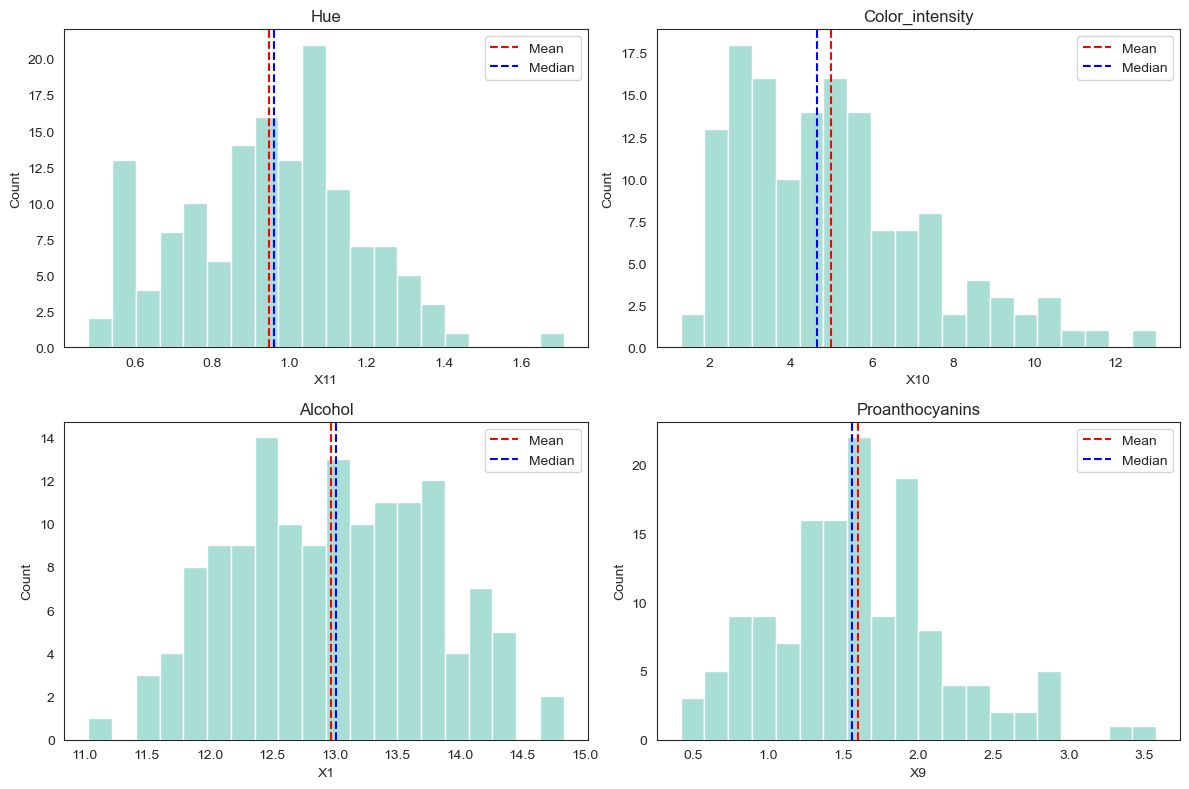

In [ ]:
# plot histograms of all features in wine dataset, colored by target variable
# create fig and axes with 2 rows and 2 columns (last row will have two empty plots)
fig, ax = plt.subplots(2,2, figsize=(12,8))
# flatten the axes array
ax = ax.flatten()

# make a hashmap of new_col_name to name
features = wine_vars[wine_vars['role'] == 'Feature']
features_dict = dict(zip(features['new_col_name'], features['name']))

# plot histograms of 4 randomly chosen features
np.random.seed(42)
selected_features = [f'X{i}' for i in np.random.choice(range(1, len(features)), 4, replace=False)]
for i, col in enumerate(selected_features):
    # plot the histogram of the feature, colored by target variable
    sns.histplot(
        data=wine, x=col, ax=ax[i],
        bins=20 # distribute data into 20 equally spaced bins
    )
    # draw a red line at the mean
    ax[i].axvline(wine[col].mean(), color="red", linestyle="--", label="Mean")
    # draw a blue line at the median
    ax[i].axvline(wine[col].median(), color="blue", linestyle="--", label="Median")
    # set the title of the plot to the name of the feature
    ax[i].set_title(features_dict[col])
    ax[i].legend()

plt.tight_layout()
plt.show()

### Variance and standard deviation
The mean and median are measures of how "central" the values in a distribution are. The mean in particular can be thought of as the "center of mass" of the distribution. We can shift the center of mass to zero by subtracting the mean from each value ("de-meaning the data"). The result distrubution reveals how the values are distributed (or vary) around the mean. Then, there are two important quantities that are computed from these variations from the mean:

1. The **sample variance** is a measure of how spread out the sample values are around its mean. It is calculated by: 
\begin{equation*}
    \textup{Sample variance} = \frac{1}{m-1}\sum_{i=1}^m (x_i - \bar{x})^2.
\end{equation*}
Note that this is almost the mean squared error of the sample from its mean, except that we divide by $m-1$ instead of $m$. This is called *Bessel's correction*, and we will not explain it here.
2. The **sample standard deviation** is simply the square root of the variance:
\begin{equation*}
    \textup{Sample standard deviation} = \sqrt{\textup{Sample variance}} = \sqrt{\frac{1}{m-1}\sum_{i=1}^m (x_i - \bar{x})^2}.
\end{equation*}